---
# **Preparation**
---

**Common**

In [34]:
# System Libraries
import tensorflow as tf
import numpy as np
import importlib

# User Libraries
import modules.Chapter_04 as Chapter_04

# Reload Libraries
importlib.reload(Chapter_04)

<module 'modules.Chapter_04' from '/Users/siddiqui/Projects/concepts/concepts-ai/modules/Chapter_04.py'>

---
# **Binary Classification**
---

**Description**

| Topic | Detail |
| --- | --- |
| Dataset | IMDB: Reviews of movies with a score for each movie |
| Sample | Review (each word has a unique number) |
| Last Activation | Sigmoid (Units=1) |
| Loss | BinaryCrossentropy |
| Optimizer | RMSprop |
| Metric | BinaryAccuracy |
| Units | Output size of layer. Defines how much info can be captured |


**Dataset**

In [2]:
num_words = 10000

# IMDB Dataset
imdb = tf.keras.datasets.imdb
(x_train_og, y_train_og), (
    x_test_og,
    y_test_og,
) = Chapter_04.BinaryClassification.dataset(num_words)

# Shuffle Dataset
# x_train_og, y_train_og = Chapter_04.Common.shuffle_data(x_train_og, y_train_og)
# x_test_og, y_test_og = Chapter_04.Common.shuffle_data(x_test_og, y_test_og)

**Exploration**

In [3]:
print(Chapter_04.Common.decode_data(imdb, [999, 19, 1000]))

['cop', 'film', 'secret']


**Encoding**

In [4]:
x_train = Chapter_04.Common.encode_data(x_train_og, num_words)
y_train = np.asarray(y_train_og).astype(np.float32)

x_test = Chapter_04.Common.encode_data(x_test_og, num_words)
y_test = np.asarray(y_test_og).astype(np.float32)

**Split**

In [5]:
x_train, y_train, x_val, y_val = Chapter_04.Common.split_data(x_train, y_train, 0.4)

**Training**

In [6]:
epochs = 10
model = Chapter_04.BinaryClassification.get_model()
history = Chapter_04.BinaryClassification.train(
    x_train, y_train, x_val, y_val, model, epochs
)

**Explore**

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])
Training Loss:  0.1604287475347519
Training Accuracy:  0.9453333616256714
Validation Loss:  0.26741480827331543
Validation Accuracy:  0.892799973487854


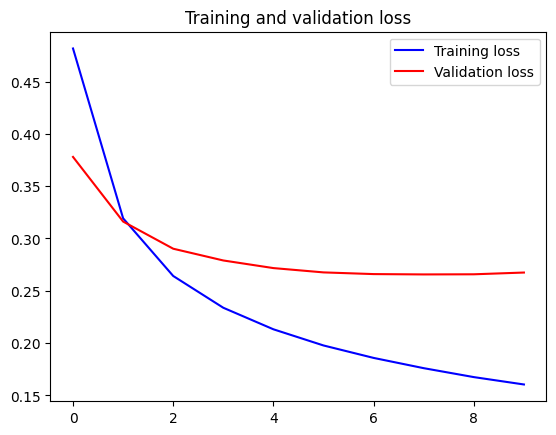

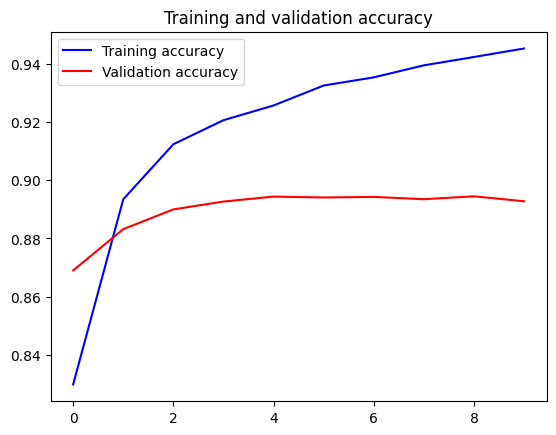

In [7]:
Chapter_04.BinaryClassification.explore(history)

**Evaluation**

In [8]:
evaluation = model.evaluate(x=x_test, y=y_test, verbose=False)
print(model.metrics_names)
print("Loss: ", evaluation[0])
print("Binary Accuracy: ", evaluation[1])

['loss', 'binary_accuracy']
Loss:  0.28288376331329346
Binary Accuracy:  0.8865600228309631


**Prediction**

In [9]:
# Prediction: Probability that a review is positive
y_predict = model.predict(x_test)[:, 0]
print("Ground: ", y_test[:10] > 0.5)
print("Predict: ", y_predict[:10] > 0.5)

782/782 [==============================] - 0s 337us/step
Ground:  [False  True  True False  True  True  True False False  True]
Predict:  [False  True  True  True  True  True  True False  True  True]


---
# **Muticlass Classification**
---

**Description**

| Topic | Detail |
|--- | --- |
| Dataset | Reuters: Newswires with a topic for each newswire |
| Sample | Newswire (each word has a unique number) |
| Target | Topics (46) |
| Last Activation | Softmax (Units=46) |
| Loss | CategoricalCrossentropy |
| Optimizer | RMSprop |
| Metric | CategoricalAccuracy |
| Note | Units in hidden layers should **always be more** than last layer |

**Dataset**

In [10]:
num_words = 10000

# Reuters Dataset
reuters = tf.keras.datasets.reuters
(x_train_og, y_train_og), (
    x_test_og,
    y_test_og,
) = Chapter_04.MultiClassification.dataset(num_words, reuters)

# Shuffle Dataset
x_train_og, y_train_og = Chapter_04.Common.shuffle_data(x_train_og, y_train_og)
x_test_og, y_test_og = Chapter_04.Common.shuffle_data(x_test_og, y_test_og)

**Exploration**

In [11]:
print(Chapter_04.Common.decode_data(reuters, [999, 19, 1000]))

['totalled', 'from', 'limit']


**Encoding**

In [12]:
x_train = Chapter_04.Common.encode_data(x_train_og, num_words)
y_train = tf.keras.utils.to_categorical(y_train_og)

x_test = Chapter_04.Common.encode_data(x_test_og, num_words)
y_test = tf.keras.utils.to_categorical(y_test_og)

**Alternate Encoding**

In [13]:
"""
- As numpy array
- Loss: SparseCategoricalCrossentropy
"""
y_train_alternate = np.array(y_train_og)
y_test_alternate = np.array(y_test_og)

**Validation**

In [14]:
x_train, y_train, x_val, y_val = Chapter_04.Common.split_data(x_train, y_train)

**Training**

In [15]:
epochs = 10
model = Chapter_04.MultiClassification.get_model()
history = model.fit(
    x=x_train, y=y_train, epochs=epochs, validation_data=(x_val, y_val), verbose=False
)

**Exploration**

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])
Training Loss:  0.09036031365394592
Training Accuracy:  0.9653307795524597
Validation Loss:  1.5162479877471924
Validation Accuracy:  0.8006681799888611


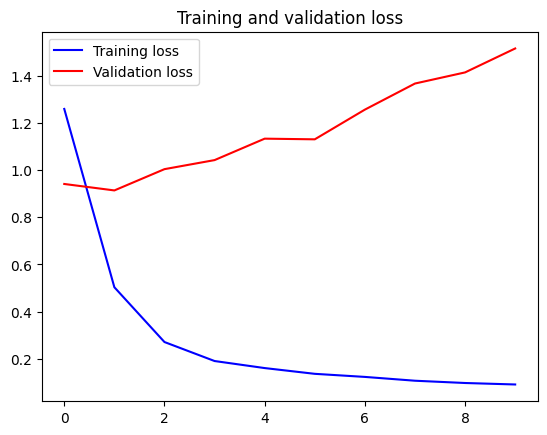

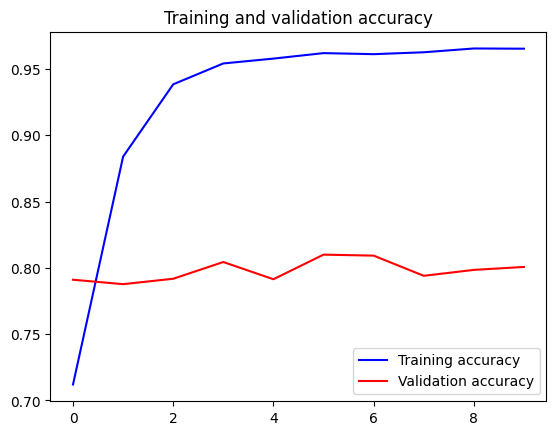

In [16]:
Chapter_04.MultiClassification.explore(history)

**Evaluation**

In [17]:
Chapter_04.MultiClassification.evaluate(x_test, y_test, model)

Evaluation Loss:  1.7018013000488281
Evaluation Accuracy:  0.7925200462341309


**Prediction**

In [18]:
Chapter_04.MultiClassification.predict(x_test, y_test, model)

71/71 [==============================] - 0s 2ms/step
----------------------------------------------
True: 3
Pred: 3
Confidence: 98%
----------------------------------------------
True: 1
Pred: 1
Confidence: 99%
----------------------------------------------
True: 4
Pred: 4
Confidence: 100%
----------------------------------------------
True: 4
Pred: 4
Confidence: 99%
----------------------------------------------
True: 9
Pred: 9
Confidence: 100%


---
# **Scalar Regression**
---

**Description**

| Topic | Detail |
|--- | --- |
| Dataset | Boston housing prices given features e.g. crime rate, tax rate etc. |
| Sample | Features (13) of a house |
| Target | Price (1) of a house |
| Last Activation | None (Units=1) |
| Loss | MeanSquaredError |
| Optimizer | RMSprop |
| Metric | MeanAbsoluteError |
| Logistic Regression | Not same as Scalar Regression. A type of classification |
| Linear Regression | Type of Scalar Regression |
| Non-uniform scaling | Each feature has a different scale  |
| Feature-wise normalization | Features must be centered around 0 with unit standard deviation |

**Dataset**

In [19]:
# Boston Dataset
(samples, labels), (
    test_samples,
    test_labels,
) = Chapter_04.ScalarRegression.dataset()

# Shuffle Dataset
samples, labels = Chapter_04.Common.shuffle_data(samples, labels)

**Feature-wise Normalization**

In [20]:
samples, test_samples = Chapter_04.ScalarRegression.normalize(samples, test_samples)

### <ins>**01. Training with Standard Split**</ins>

**Train / Val Dataset**

In [21]:
train_samples, train_labels, val_samples, val_labels = Chapter_04.Common.split_data(
    samples, labels, 0.3
)

**Training**

In [22]:
epochs = 120
standard_model = Chapter_04.ScalarRegression.get_model()
standard_history = standard_model.fit(
    x=train_samples,
    y=train_labels,
    epochs=epochs,
    validation_data=(val_samples, val_labels),
    verbose=False,
)

**Summary**

- When the dataset is very small, normal train/val division (70% / 30%) does not work good
- K-Fold Cross-Validation is the recommended method


### <ins>**02. Training with K-Fold Cross-Validation**</ins>

  **Explanation**
  - Divide dataset into multiple small folds
  - This way whole dataset is used for training as well as  validation
  - Take the mean after all iterations
  - **Don't shuffle data between folds**

**Example**

In [23]:
"""
Note: Run the snippet in debugger mode with breakpoint in the k-fold function
"""
Chapter_04.Common.explore_k_fold()

**Training**

In [28]:
num_fold = 10
fold_size = len(samples) // num_fold

# History per fold per epoch
histories = {
    "loss": [],
    "val_loss": [],
    "mean_absolute_error": [],
    "val_mean_absolute_error": [],
}

# Training per fold
for fold_count in range(num_fold):
    # Samples using K-Fold
    train_samples, val_samples = Chapter_04.Common.split_data_kfold(
        samples, fold_count, fold_size
    )
    # Labels using K-Fold
    train_labels, val_labels = Chapter_04.Common.split_data_kfold(
        labels, fold_count, fold_size
    )
    # New model per fold
    kfold_model = Chapter_04.ScalarRegression.get_model()
    # Training
    history_per_epoch = kfold_model.fit(
        x=train_samples,
        y=train_labels,
        epochs=epochs,
        validation_data=(val_samples, val_labels),
        verbose=False,
    )
    # Save history per epoch per fold
    Chapter_04.Common.save_history(histories, history_per_epoch.history)

# Mean history of all fold for each epoch
kfold_history = Chapter_04.Common.mean_history(histories)

### <ins>**03. Comparison of Standard and K-Fold**</ins>

**Exploration**

Mean Training MAE:  1.7437296664714814
Mean Validation MAE:  2.889149124622345


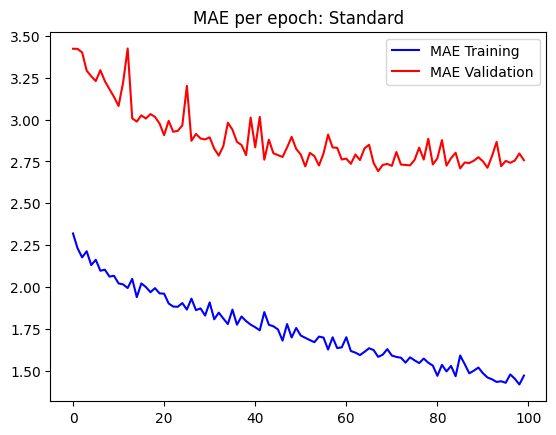

Mean Training MAE:  1.8436930357085333
Mean Validation MAE:  2.333226541413201


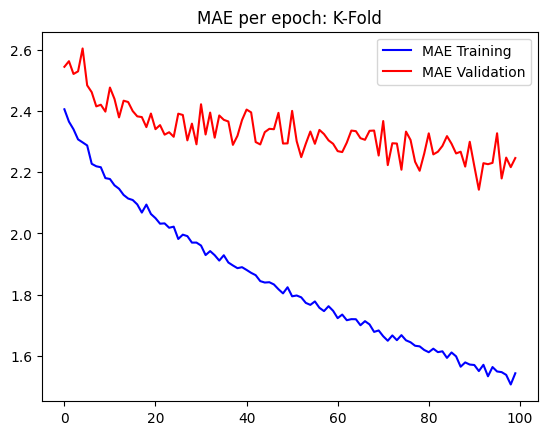

In [35]:
Chapter_04.Common.get_history(standard_history.history, "Standard")
Chapter_04.Common.get_history(kfold_history, "K-Fold")

**Evaluation**

In [30]:
Chapter_04.ScalarRegression.get_evaluation(
    test_samples, test_labels, standard_model, "Standard"
)
Chapter_04.ScalarRegression.get_evaluation(
    test_samples, test_labels, kfold_model, "K-Fold"
)

Mean Test MAE (Standard): 2.9775586128234863
Mean Test MAE (K-Fold): 2.732297658920288


**Prediction**

In [31]:
Chapter_04.ScalarRegression.get_prediction(
    test_samples, test_labels, standard_model, "Standard"
)
Chapter_04.ScalarRegression.get_prediction(
    test_samples, test_labels, kfold_model, "K-Fold"
)


-------------------------------------------
Standard
-------------------------------------------

Ground: 7.2 Predict: 10.463580131530762
Error: 3.2635801315307615

Ground: 18.8 Predict: 18.258647918701172
Error: 0.5413520812988288

Ground: 19.0 Predict: 22.539630889892578
Error: 3.539630889892578


-------------------------------------------
K-Fold
-------------------------------------------

Ground: 7.2 Predict: 6.871960639953613
Error: 0.3280393600463869

Ground: 18.8 Predict: 19.144020080566406
Error: 0.34402008056640554

Ground: 19.0 Predict: 21.934444427490234
Error: 2.9344444274902344



---